In [3]:
import pandas as pd

In [35]:
df = pd.read_csv("GemStone.csv")

In [36]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [44]:
df.rename(columns={'Unnamed: 0':'id'},inplace =True)

In [45]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [8]:
#Handling the missing values
df.isnull().sum()

id           0
carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [9]:
df['depth'] .dtype

dtype('float64')

In [37]:
import numpy as np
df['depth'] = df['depth'].fillna(np.mean(df['depth']))
# And also we can do in some other way


In [38]:
df['depth'].isnull().sum()

np.int64(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       26967 non-null  int64  
 1   carat    26967 non-null  float64
 2   cut      26967 non-null  object 
 3   color    26967 non-null  object 
 4   clarity  26967 non-null  object 
 5   depth    26967 non-null  float64
 6   table    26967 non-null  float64
 7   x        26967 non-null  float64
 8   y        26967 non-null  float64
 9   z        26967 non-null  float64
 10  price    26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [13]:
df['cut'].value_counts()

cut
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: count, dtype: int64

In [14]:
df['cut'].dtype

dtype('O')

In [15]:
df['color'].value_counts()

color
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: count, dtype: int64

In [16]:
df['clarity'].value_counts()

clarity
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: count, dtype: int64

In [17]:
df.corr()

ValueError: could not convert string to float: 'Ideal'

In [46]:
df = df.drop(columns = ['id'],axis = 1)

In [19]:
df.head(1)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.3,Ideal,E,SI1,61.745147,58.0,4.27,4.29,2.66,499


In [20]:
df.duplicated().sum()

np.int64(38)

In [21]:
df = df.drop_duplicates()

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
#Segregating Numerical and categorical features
num_features = [feature for feature in df.columns if df[feature].dtype !='O']
print("My Numerical Features are", num_features)
cat_features = df.select_dtypes(include = 'O').columns
print(f"My Categorical Features are {list(cat_features)}")

My Numerical Features are ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
My Categorical Features are ['cut', 'color', 'clarity']


In [24]:
df.describe()

,carat,depth,table,x,y,z,price
count,26929.000000,2.692900e+04,26929.000000,26929.000000,26929.000000,26929.000000,26929.000000
mean,0.797978,6.174515e+01,57.456055,5.729362,5.733120,3.537763,3937.330573
std,0.477058,7.105559e-15,2.232283,1.127200,1.164886,0.719831,4021.779695
min,0.200000,6.174515e+01,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,6.174515e+01,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,6.174515e+01,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,6.174515e+01,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,6.174515e+01,79.000000,10.230000,58.900000,31.800000,18818.000000


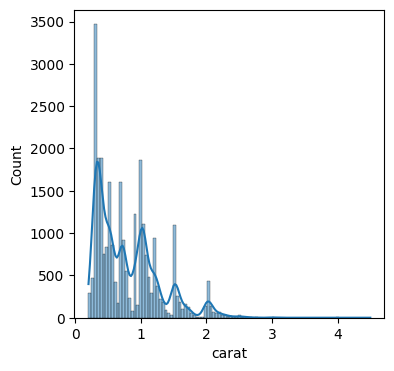

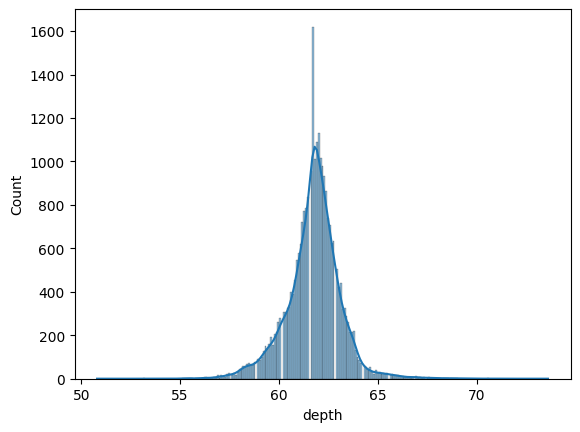

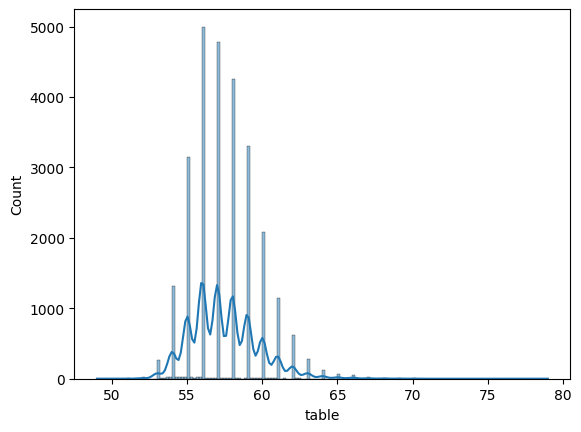

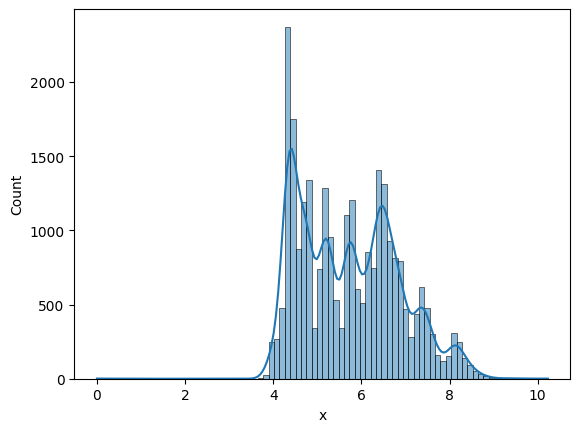

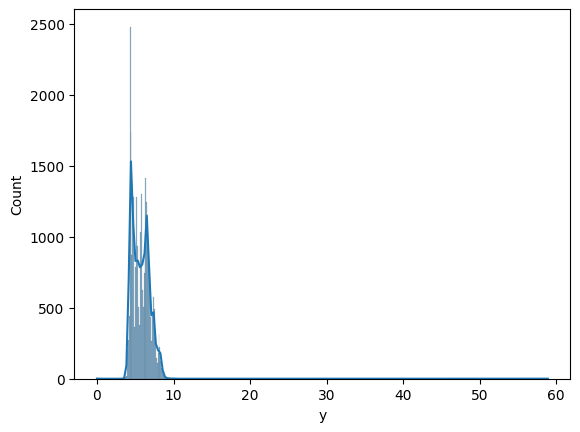

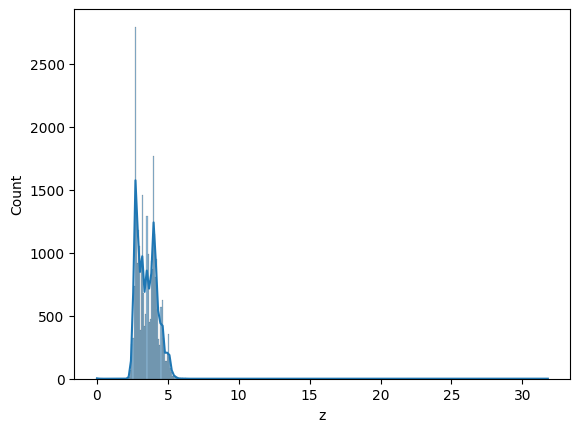

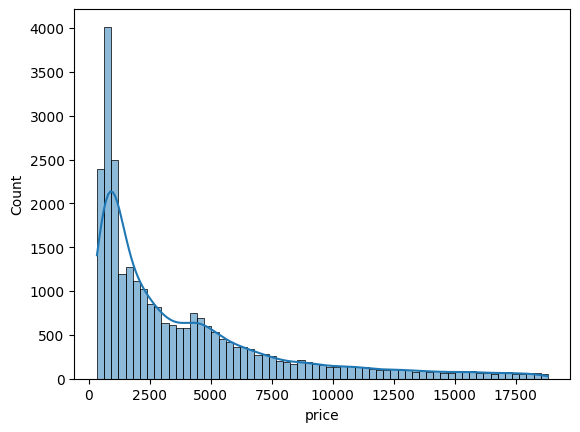

In [40]:
#To Visualize the num_features
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
x = 1
for i in num_features:
    sns.histplot(data = df,x=i,kde = True)
    print('\n')
    plt.show()

In [39]:
df['depth'].value_counts()

depth
62.0    1131
61.9    1091
62.1    1016
61.8    1012
62.2     977
        ... 
70.5       1
69.6       1
72.9       1
72.2       1
70.8       1
Name: count, Length: 170, dtype: int64

C:\Users\Sai Kaushik\AppData\Local\Temp\ipykernel_17796\3145781280.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num_features])


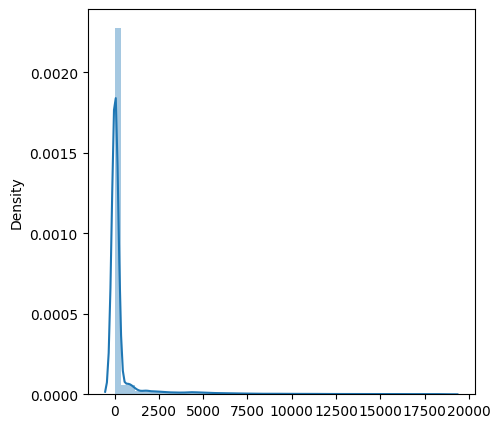

C:\Users\Sai Kaushik\AppData\Local\Temp\ipykernel_17796\3145781280.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num_features])


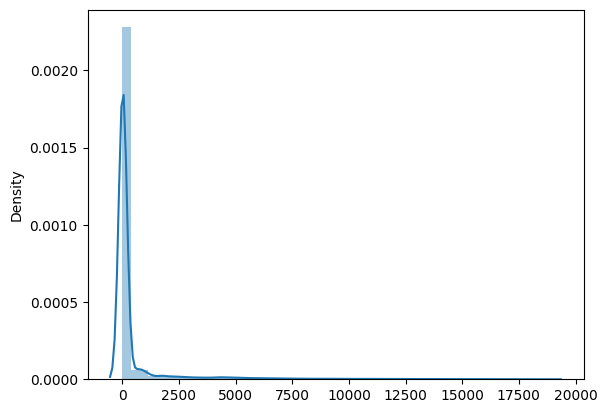

C:\Users\Sai Kaushik\AppData\Local\Temp\ipykernel_17796\3145781280.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num_features])


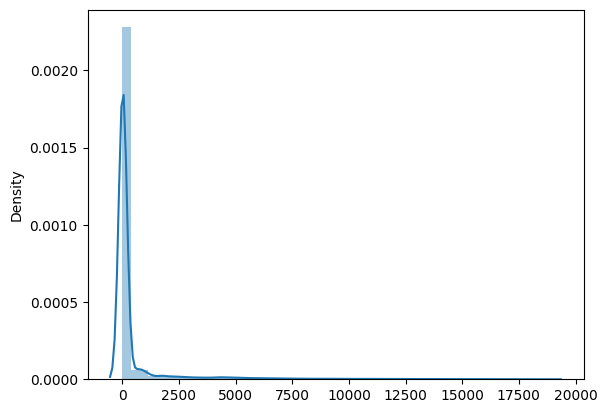

C:\Users\Sai Kaushik\AppData\Local\Temp\ipykernel_17796\3145781280.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num_features])


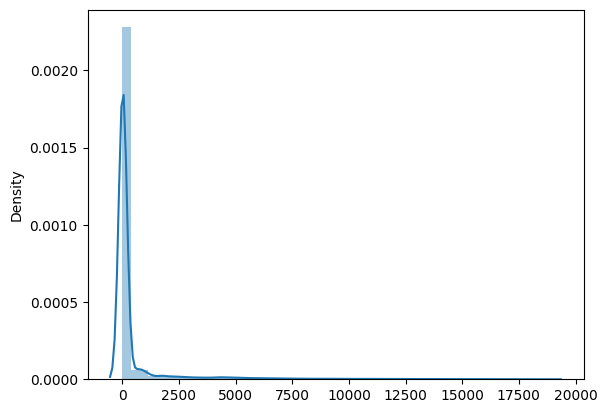

C:\Users\Sai Kaushik\AppData\Local\Temp\ipykernel_17796\3145781280.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num_features])


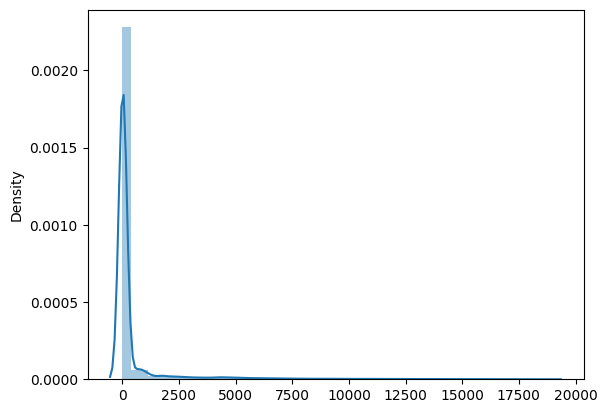

C:\Users\Sai Kaushik\AppData\Local\Temp\ipykernel_17796\3145781280.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num_features])


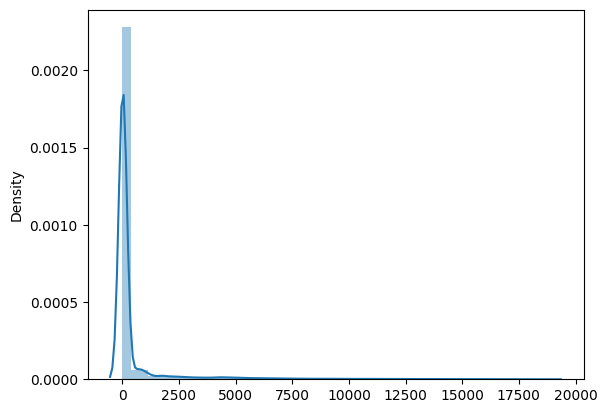

C:\Users\Sai Kaushik\AppData\Local\Temp\ipykernel_17796\3145781280.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num_features])


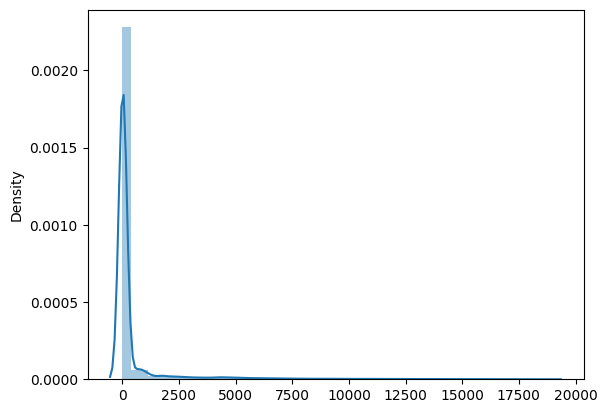

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
x = 1
for i in num_features:
    sns.distplot(df[num_features])
    print('\n')
    plt.show()

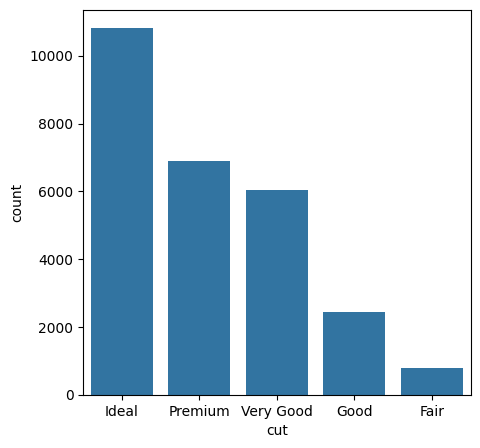

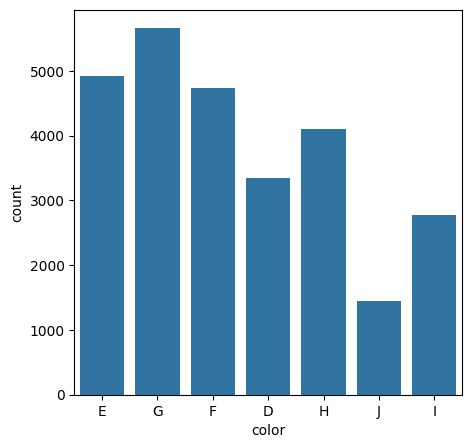

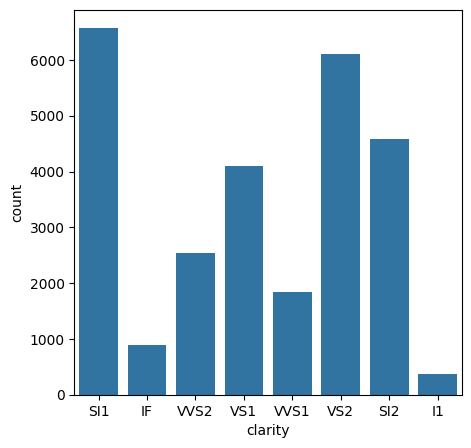

In [47]:
#To Visualize the cat_features
for i in cat_features:
    plt.figure(figsize=(5,5))
    sns.countplot(data = df,x=i)
    plt.show()

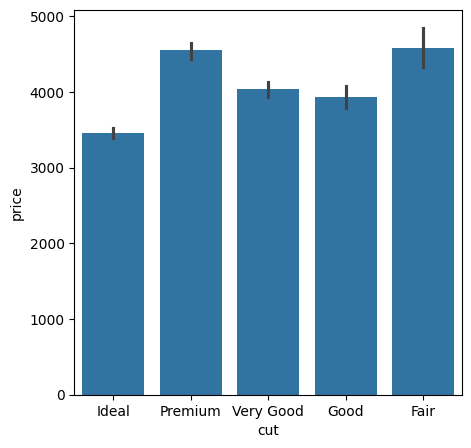

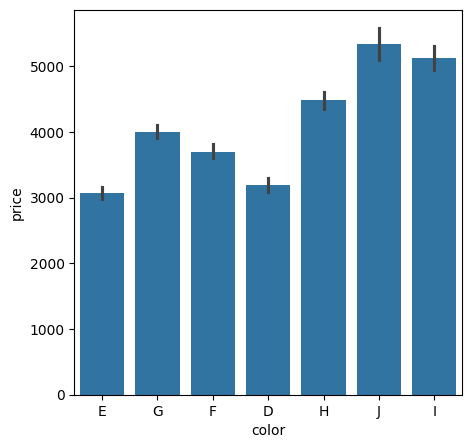

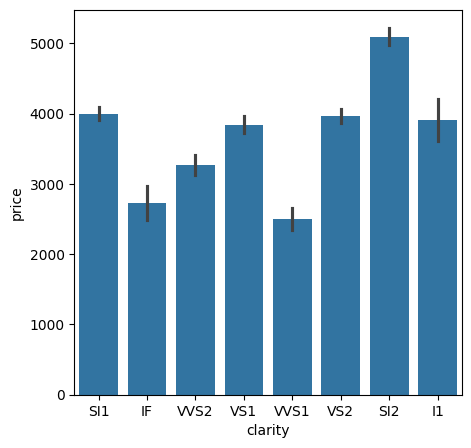

In [49]:
for i in cat_features:
    plt.figure(figsize=(5,5))
    sns.barplot(data = df,x=i,y=df['price'])
    plt.show()

<Axes: >

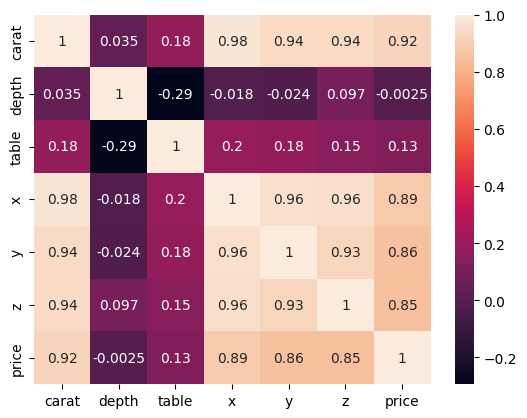

In [64]:
#To Visualize the correlation between the data
#we can check the correlation of one feture to another only to the numeric_coulumns only
sns.heatmap(df[num_features].corr(),annot = True)  


#MultiColinearity:-
    #To check the correlation blw independent to another independent if both are having highly correalation with each other
    #then we no need to take both features right..we can take any one feature.
#In our data we can remove x,y,z because of having price column in our dataset which will do the work of the x,y,z features also

df = df.drop(columns = ['x','y','z'],axis = 1)

In [74]:
df.shape

(26967, 7)

In [69]:
df_sample = df.sample(frac = 0.1)

In [70]:
df_sample.shape

(2697, 7)

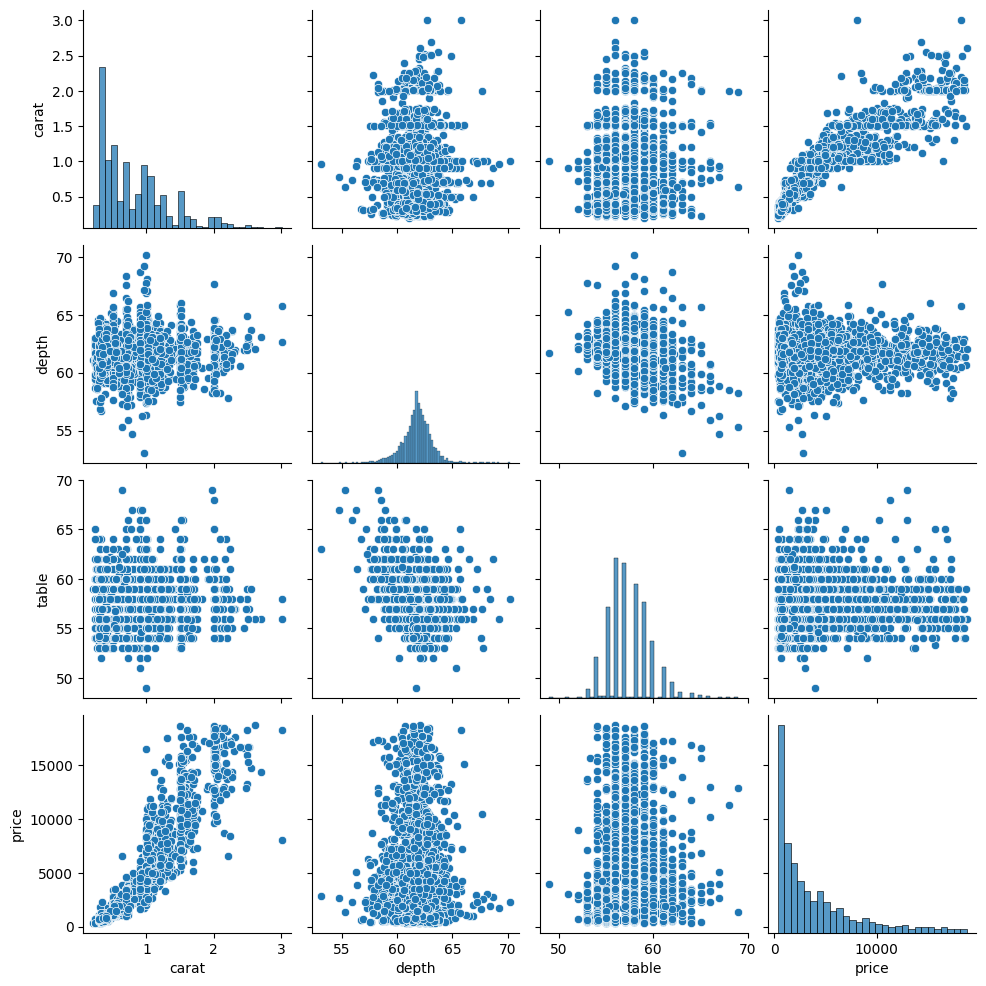

In [71]:
sns.pairplot(df_sample)

In [78]:
df = df.drop(columns = ['depth'],axis = 1)

In [80]:
df.shape

(26967, 6)